In [ ]:
# This program uses artifical nueral netwrok called long short term memeory (LSTM) 
# to predict closing price of the Apple using past 60 day data

In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
# Get stock Quote of Apple Inc.
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-30')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-01-24,323.329987,317.519989,320.250000,318.309998,36634400.0,317.556335
2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.218506
2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,316.937805


In [ ]:
# Get the number of rows and column
df.shape

(2032, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


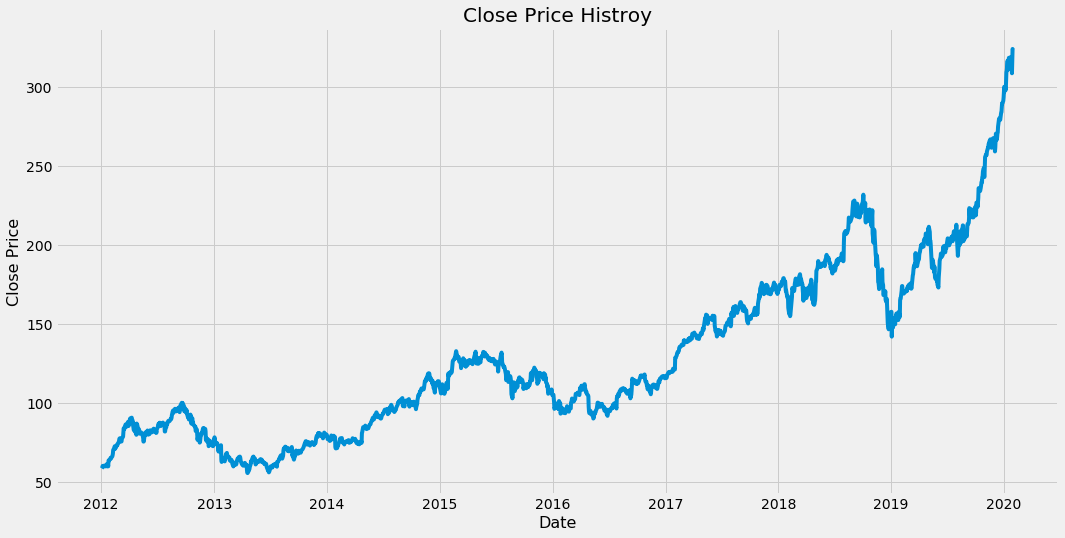

In [ ]:
# Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price Histroy')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize='16')
plt.ylabel('Close Price', fontsize='16')
plt.show()


In [ ]:
# Create a new dataframe with only close column
data = df.filter(['Close'])
# Convert the dataframe to numpy 
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1626

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01101151],
       [0.01218714],
       [0.01462882],
       ...,
       [0.97523741],
       [1.        ],
       [0.99824986]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data in xtrain and ytrain dataset
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

# In first pass through the lopp x_train has one array but in second pass thorugh
# there are two array. Second array's first element is equal to second element of
# first array and y_train's first element is the same of the second array's last 
# element

[array([0.01101151, 0.01218714, 0.01462882, 0.01695348, 0.01659707,
       0.01740032, 0.01703327, 0.0164162 , 0.01557571, 0.01817698,
       0.02052292, 0.01979945, 0.01583637, 0.01961858, 0.01589488,
       0.02985876, 0.02877888, 0.03018858, 0.03323669, 0.03508257,
       0.03492831, 0.03435912, 0.03678485, 0.03906693, 0.04165226,
       0.04582813, 0.0546001 , 0.05473309, 0.05961647, 0.06326568,
       0.05699389, 0.05940899, 0.05936112, 0.06613295, 0.06517009,
       0.06695214, 0.07015452, 0.0719366 , 0.07706998, 0.08080965,
       0.0818895 , 0.0822672 , 0.07587309, 0.07433039, 0.07455914,
       0.08057024, 0.08226189, 0.08589514, 0.09445966, 0.10588611,
       0.10374764, 0.10375295, 0.11201426, 0.11459956, 0.11275899,
       0.11107802, 0.10932788, 0.11514215, 0.11913185, 0.1208022 ])]
[0.11667419757475875]
[array([0.01101151, 0.01218714, 0.01462882, 0.01695348, 0.01659707,
       0.01740032, 0.01703327, 0.0164162 , 0.01557571, 0.01817698,
       0.02052292, 0.01979945, 0.015

In [ ]:
# Convert the x_train and y_train to numpy
x_train, y_train = np.array(x_train),np.array(y_train)


In [ ]:
# Reshape the x_train data
# LSTM network expects the input to be in 3D in form of no.of sample, no. of timestep
# and no. of feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1566, 60, 1)

In [ ]:
# Build the Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
# return_sequence = True because we are using another LSTM Layer for model architecture
model.add(LSTM(50, return_sequences=False, ))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Optimizer is used to upon imporve loss function
# Loss function is used to mesaure how well the model did on training

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)
# Epochs is the number of iteration when the entire dataset is passed forward and backward in neural network

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1566/1566 [==============================] - 282s 180ms/step - loss: 4.8309e-04


In [ ]:
# Create the testing dataset
# Create new array conatining containing scaled value from index 1566 to 2032
test_data = scaled_data[training_data_len-60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
# y_test will be the value we want our model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
# Convert the data into a numpy array so that we can use it in LSTM Model
x_test =np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Evalue the model br getting root mean squared error (RMSE) 
# Lower value of RMSE indicated better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.9613851537845406

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


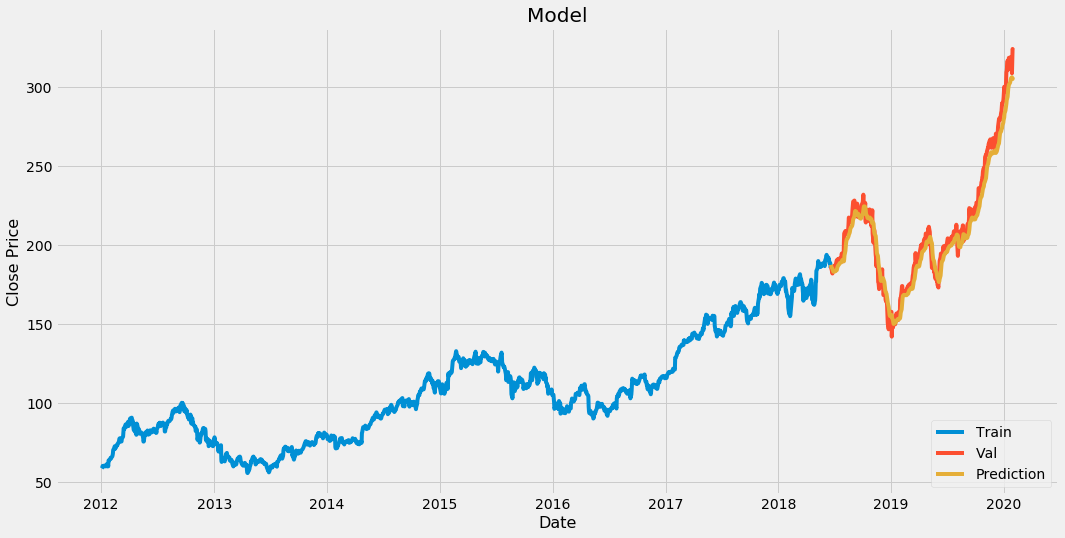

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted price
valid

,Close,Prediction
Date,,
2018-06-20,186.500000,187.653137
2018-06-21,185.460007,186.818542
2018-06-22,184.919998,186.015945
2018-06-25,182.169998,185.283035
2018-06-26,184.429993,184.311951
...,...,...
2020-01-24,318.309998,305.822266
2020-01-27,308.950012,306.426971
2020-01-28,317.690002,305.480682


In [ ]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-02-20')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Ge the last 60 day close price value and convert the dataframe to array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted scale data
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[312.1597]]


In [ ]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-02-20', end='2020-02-20')
print(apple_quote2['Close'])

Date
2020-02-19    323.619995
Name: Close, dtype: float64
